In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./dataset_1.csv")
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [3]:
df.head(24)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
df.head(24)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


## Q1
Which date had the most completed trips during the two week period?

In [6]:
trips_by_day = df.groupby('Date').sum()[['Completed Trips']]
trips_by_day

,Completed Trips
Date,
10-Sep-12,26
11-Sep-12,40
12-Sep-12,91
13-Sep-12,45
14-Sep-12,108
15-Sep-12,199
16-Sep-12,93
17-Sep-12,57
18-Sep-12,42


In [7]:
trips_by_day['Completed Trips'].nlargest(1)

Date
22-Sep-12    248
Name: Completed Trips, dtype: int64

## A1: 22-Sep-12 has the largest number of completed trips during the two-week period with 248

## Q2
What was the highest number of completed trips within a 24 hour period?


In [8]:
def create_timestamp(d, t):
    return pd.to_datetime(f"{d} {t}:00")

In [9]:
# df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

df['Timestamp'] = df['Date'] + " " + df['Time (Local)'].astype(str) + ":00"
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')



In [10]:
df['Trips in the last 24 Hour'] = df['Completed Trips'].rolling("24H").sum()

In [11]:
df.nlargest(1,'Trips in the last 24 Hour')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour
Timestamp,,,,,,,,
2012-09-22 16:00:00,22-Sep-12,16,58,17,15,18,16,278.0


## A2: the highest number of completed trips within a 24 hour period is 278, which happened in the 24 hour period prior to (does not include) 2012-09-22 17:00:00 (since the time stamp is at the start of the hour).


## Q3 Which hour of the day had the most requests during the two week period?

In [12]:
requests_by_hour = df.groupby('Time (Local)').mean()[['Requests']]
requests_by_hour.nlargest(columns='Requests',n=1)

,Requests
Time (Local),
23,13.142857


## A3: 11pm had the most requests

## Q4 What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [13]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour
Timestamp,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0


In [14]:
total_zeros = df.Zeroes.sum()
total_zeros

1429

In [15]:
df['Day of Week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [16]:
weekend_zeros = df[
    ((df['Day of Week']==4) & (df['Time (Local)']>=17)) |
    (df['Day of Week']==5) |
    ((df['Day of Week']==6) & (df['Time (Local)']<3))]['Zeroes'].sum()

In [17]:
f"{weekend_zeros/total_zeros*100:.2f} %"

'44.86 %'

## A4: 44.86%

## Q5
What is the weighted average ratio of completed trips per driver during the two week period?

In [18]:
df['Completed trip ratio per driver'] = df['Completed Trips'] / df['Unique Drivers']
df_nonan = df[(df['Unique Drivers'] > 0)]
df_nonan

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour,Day of Week,Completed trip ratio per driver
Timestamp,,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0,0,0.222222
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0,0,0.142857
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0,0,0.000000
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0,0,0.000000
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0,0,0.363636
...,...,...,...,...,...,...,...,...,...,...
2012-09-23 22:00:00,23-Sep-12,22,17,2,2,2,6,133.0,6,0.333333
2012-09-23 23:00:00,23-Sep-12,23,9,3,3,3,3,111.0,6,1.000000
2012-09-24 00:00:00,24-Sep-12,0,7,2,1,2,2,89.0,0,0.500000


In [19]:
# compared to not_weighted

not_weighted = df_nonan['Completed trip ratio per driver'].mean()
f"{not_weighted:.2%}"

'47.43%'

In [20]:
weighted_average_ratio = (df_nonan['Completed trip ratio per driver'] * (df_nonan['Completed Trips'] / df_nonan['Completed Trips'].sum())).mean()
f"{weighted_average_ratio:.2%}"

'0.28%'

## A5: weighted is 0.28%, unweighted = 47.43%

## Question 6
In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [21]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour,Day of Week,Completed trip ratio per driver
Timestamp,,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0,0,0.222222
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0,0,0.142857
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0,0,0.000000
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0,0,0.000000
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0,0,0.363636


In [22]:
df['Requests in last 8hrs'] = df.Requests.rolling("8H").sum()

In [23]:
df_requests_8hrs = df[["Time (Local)",'Requests in last 8hrs']]
df_requests_8hrs = df_requests_8hrs.dropna()
df_requests_8hrs
df_most_requests_8hrs=df_requests_8hrs.groupby("Time (Local)").mean().reset_index()["Requests in last 8hrs"]
df_most_requests_8hrs.nlargest(1)


0    78.0
Name: Requests in last 8hrs, dtype: float64

## A6: Because the timestamp is at the start of the hour, the output of hour 0 means before 1:00. This means the busiest 8hrs shift would be 8hrs before 1am. That's starting by 5:00pm, and then ends by 1:00am

## Question 7
True or False: Driver supply always increases when demand increases during the two week period.

In [24]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour,Day of Week,Completed trip ratio per driver,Requests in last 8hrs
Timestamp,,,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0,0,0.222222,2.0
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0,0,0.142857,4.0
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0,0,0.000000,4.0
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0,0,0.000000,5.0
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0,0,0.363636,9.0


In [25]:
difference_df = df.copy()[['Requests','Unique Drivers']]
difference_df['request_diff'] = df['Requests'].shift(-1) - df['Requests']
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']

In [26]:
difference_df

,Requests,Unique Drivers,request_diff,supply_diff
Timestamp,,,,
2012-09-10 07:00:00,2,9,0.0,5.0
2012-09-10 08:00:00,2,14,-2.0,0.0
2012-09-10 09:00:00,0,14,1.0,0.0
2012-09-10 10:00:00,1,14,3.0,-3.0
2012-09-10 11:00:00,4,11,-2.0,0.0
...,...,...,...,...
2012-09-24 02:00:00,2,0,-1.0,0.0
2012-09-24 03:00:00,1,0,-1.0,0.0
2012-09-24 04:00:00,0,0,1.0,3.0


In [27]:
difference_df = difference_df[difference_df['request_diff']>0]
(difference_df['supply_diff']>0).all()

False

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

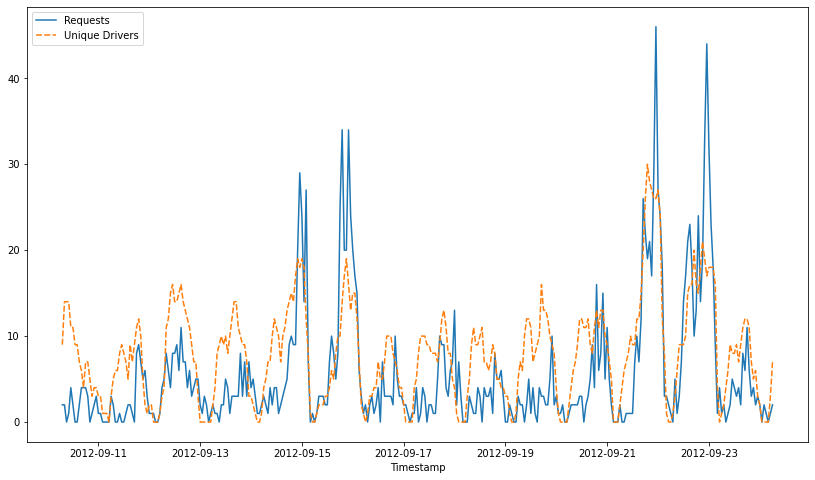

In [29]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df[['Requests', 'Unique Drivers']])
plt.show()

## A7: Driver supply can both increase or decrease when the demand increases in the hour. The assumption of the question is false. Also as can be seen from the plot, the driver upply is correlated to the demand, but does not always grow when there's growing demand. 

## Question 8
In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [30]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour,Day of Week,Completed trip ratio per driver,Requests in last 8hrs
Timestamp,,,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0,0,0.222222,2.0
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0,0,0.142857,4.0
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0,0,0.000000,4.0
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0,0,0.000000,5.0
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0,0,0.363636,9.0


In [31]:
df['Zeros in last 72hrs'] = df['Zeroes'].rolling("72H").sum()
df['Eyeballs in last 72hrs'] = df['Eyeballs'].rolling("72H").sum()
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Trips in the last 24 Hour,Day of Week,Completed trip ratio per driver,Requests in last 8hrs,Zeros in last 72hrs,Eyeballs in last 72hrs
Timestamp,,,,,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,2.0,0,0.222222,2.0,0.0,5.0
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,4.0,0,0.142857,4.0,0.0,11.0
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,4.0,0,0.000000,4.0,3.0,19.0
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,4.0,0,0.000000,5.0,5.0,28.0
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,8.0,0,0.363636,9.0,6.0,39.0


In [48]:
from datetime import timedelta

df['Z to E Ratio in last 72hrs'] = df['Zeros in last 72hrs'] / df['Eyeballs in last 72hrs']
time_format = "%Y/%m/%d %H:%M"


f"{(df.nlargest(1,'Z to E Ratio in last 72hrs').index - timedelta(hours = 72) + timedelta(hours = 1)).strftime(time_format).tolist()} to {(df.nlargest(1,'Z to E Ratio in last 72hrs').index + timedelta(hours = 1)).strftime(time_format).tolist()}"



"['2012/09/15 05:00'] to ['2012/09/18 05:00']"

## The 3 days from 2012/09/15 05:00 to 2012/09/18 05:00 has the worst zeros to eyeballs ratio.

## Question 9
If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

Hint: Consider both rider eyeballs and driver supply when choosing

In [53]:
df_agg_by_hr=df.groupby('Time (Local)').sum().reset_index()
df_agg_by_hr['eyeball to driver ratio'] = df_agg_by_hr['Eyeballs'] / df_agg_by_hr['Unique Drivers']


In [56]:
df_agg_by_hr['eyeball to driver ratio'].nlargest(1)

23    4.10084
Name: eyeball to driver ratio, dtype: float64

## A9: I would add drivers to 11pm because it has the largest eyeball to driver ratio.

## Question 10
True or False: There is exactly two weeks of data in this analysis

In [70]:
df.index[-1]-df.index[0]

Timedelta('13 days 23:00:00')

## A10: That's a bit less than exactly two weeks or 14 days of data.

## Question 11

Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

Tip: Visualize the data to confirm your answer if needed.